In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

log_gross_bin
2    250
7    250
6    250
1    250
0    250
3    250
5    250
4    250
Name: count, dtype: int64
Train size: 1800
Test size: 200


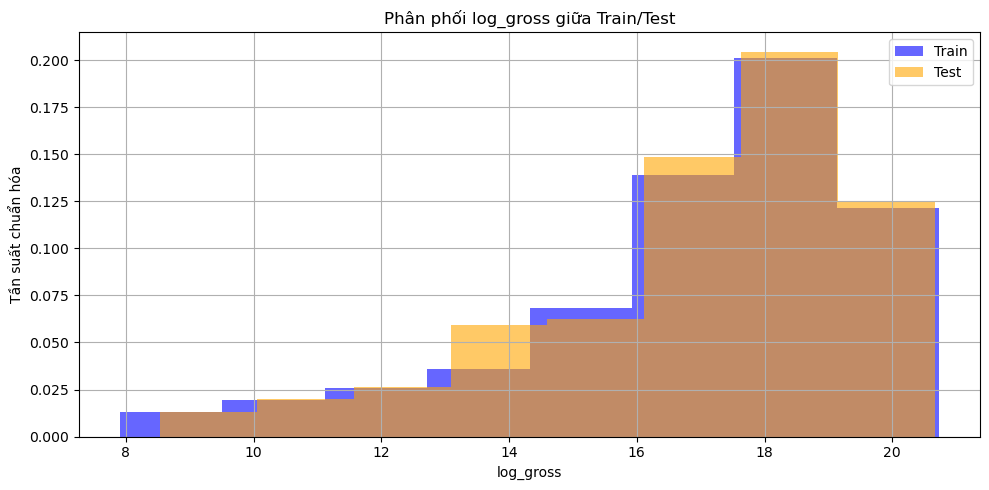

In [2]:
# Đọc dữ liệu
df = pd.read_csv("dataset/movies_data_processed_v4.csv")
from settings import TARGET, GROSS_BIN

y_binned = df["log_gross_bin"]
print(y_binned.value_counts())
# Chia train/test theo tỷ lệ 90/10
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_idx, test_idx in splitter.split(df, y_binned):
    df_train = df.iloc[train_idx]
    df_test = df.iloc[test_idx]

# Lưu ra file CSV
df_train.to_csv("dataset/train.csv", index=False)
df_test.to_csv("dataset/test.csv", index=False)

# Thống kê
print(f"Train size: {len(df_train)}")
print(f"Test size: {len(df_test)}")


plt.figure(figsize=(10, 5))
plt.hist(df_train[TARGET], bins=GROSS_BIN, alpha=0.6, label='Train', color='blue', density=True)
plt.hist(df_test[TARGET], bins=GROSS_BIN, alpha=0.6, label='Test', color='orange', density=True)
plt.title(f"Phân phối {TARGET} giữa Train/Test")
plt.xlabel(TARGET)
plt.ylabel("Tần suất chuẩn hóa")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
print("Tỷ lệ các lớp trong tập Train:")
print(df_train["log_gross_bin"].value_counts(normalize=True))
print("\nTỷ lệ các lớp trong tập Test:")
print(df_test["log_gross_bin"].value_counts(normalize=True))

Tỷ lệ các lớp trong tập Train:
log_gross_bin
2    0.125
0    0.125
1    0.125
5    0.125
6    0.125
7    0.125
4    0.125
3    0.125
Name: proportion, dtype: float64

Tỷ lệ các lớp trong tập Test:
log_gross_bin
5    0.125
3    0.125
1    0.125
7    0.125
0    0.125
2    0.125
6    0.125
4    0.125
Name: proportion, dtype: float64
